In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn import preprocessing

In [3]:
filepath = '/Users/rabarry/Documents/Data Science Project/Flicker_SVM.csv'
flick = pd.read_csv(filepath)

In [4]:
flick.describe()

,part,CB,AGEgrp,face_T5,face_O1,face_T6,face_O2,obj_T5,obj_O1,obj_T6,obj_O2
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,216.364407,1.423729,0.398305,0.103888,0.189547,0.144151,0.211786,0.171036,0.330665,0.188321,0.349652
std,93.128774,0.496256,0.491637,0.159787,0.241889,0.206995,0.230257,0.259109,0.390692,0.266561,0.396027
min,100.000000,1.000000,0.000000,-0.268466,-0.253481,-0.297485,-0.228624,-0.293793,-0.602527,-0.308235,-0.285660
25%,136.250000,1.000000,0.000000,-0.005725,0.037279,-0.011368,0.058548,-0.000739,0.065150,-0.006310,0.044520
50%,176.000000,1.000000,0.000000,0.089687,0.148373,0.121371,0.157080,0.109658,0.263119,0.116509,0.253263
75%,321.750000,2.000000,1.000000,0.183110,0.317027,0.273667,0.332161,0.294846,0.578181,0.346948,0.612906
max,351.000000,2.000000,1.000000,0.708441,1.161272,0.951748,1.054175,1.069666,2.006840,1.037423,1.931580


# first, try out regression on something we know is related
We're using the face response over occipital temporal channels and the object response over occipital temporal channels

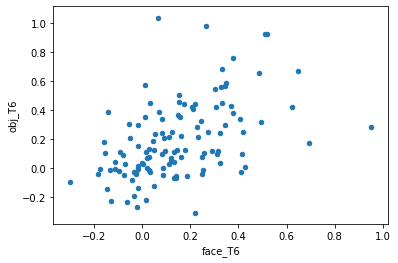

In [4]:
flick.plot("face_T6", "obj_T6", kind="scatter")
plt.show()

Run the model

In [5]:
from sklearn.linear_model import LinearRegression

X = flick.face_T6.values.reshape(-1, 1)
Y = flick.obj_T6.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, Y)
slopes = model.coef_
intercept = model.intercept_

print(slopes, intercept)

[[0.62856165]] [0.09771352]


Plot the results

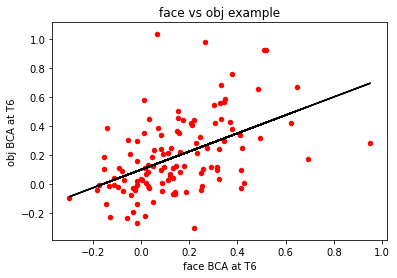

In [7]:
flick1 = flick.plot("face_T6", "obj_T6", kind="scatter", title="face vs obj example", color="red")
flick1.set_xlabel("face BCA at T6")
flick1.set_ylabel("obj BCA at T6")

flick1.plot(X, X * slopes[0] + intercept, 'black')

plt.show()

In [8]:
#print predicted obj T6 BCA
data = pd.DataFrame({
    'face_T6': flick.face_T6,
    'obj_T6': flick.obj_T6
})
data['predicted_obj_T6'] = data.face_T6 * slopes[0] + intercept
data.head()

,face_T6,obj_T6,predicted_obj_T6
0,0.095991,0.116441,0.158050
1,0.047678,0.187087,0.127682
2,-0.040757,-0.080178,0.072096
3,-0.155197,0.182501,0.000163
4,0.412979,-0.027206,0.357296


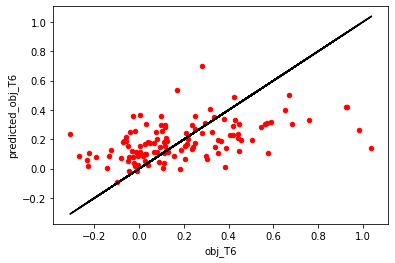

In [12]:
#plot predicted obj T6 vs actual obj T6
predicted1 = data.plot('obj_T6', 'predicted_obj_T6', kind='scatter', color='red')
predicted1.plot(data.obj_T6, data.obj_T6, 'black')
plt.show()

Compute the squared error for each data point

In [13]:
#squared error
data['squared_error'] = (data.obj_T6 - data.predicted_obj_T6)**2
data.head()

,face_T6,obj_T6,predicted_obj_T6,squared_error
0,0.095991,0.116441,0.158050,0.001731
1,0.047678,0.187087,0.127682,0.003529
2,-0.040757,-0.080178,0.072096,0.023187
3,-0.155197,0.182501,0.000163,0.033247
4,0.412979,-0.027206,0.357296,0.147842


In [14]:
data.squared_error.mean()

0.05366736340137008

# Now try classification methods

We'll split the data into training and test sets first.

In [9]:
from sklearn.model_selection import train_test_split

Specify which columns are the features

In [10]:
flick_X = flick[['face_T5', 'face_O1', 'face_O2', 'face_T6', 'obj_T5', 'obj_O1', 'obj_O2', 'obj_T6']]

In [11]:
flick_X.shape

(118, 8)

In [12]:
flick_X.head()

,face_T5,face_O1,face_O2,face_T6,obj_T5,obj_O1,obj_O2,obj_T6
0,-0.063974,0.094894,0.036650,0.095991,-0.168468,-0.009702,-0.082563,0.116441
1,0.116682,0.011366,0.365330,0.047678,0.632576,0.093175,0.154276,0.187087
2,0.088963,0.057619,0.112609,-0.040757,-0.063958,-0.165908,-0.002225,-0.080178
3,-0.141865,0.172576,0.035923,-0.155197,-0.074841,0.220149,0.394895,0.182501
4,-0.075531,0.402890,0.474245,0.412979,0.185001,-0.116069,-0.285660,-0.027206


Specify which column is your group ID

In [13]:
flick_y = flick['AGEgrp']

In [8]:
flick_y.head()

0    0
1    0
2    0
3    0
4    0
Name: AGEgrp, dtype: int64

In [16]:
#Get rid of the row nums
flick_y = np.ravel(flick_y)

In [14]:
Ages = ['baby', 'adult']

In [15]:
feature_names = ['face_T5', 'face_O1', 'face_O2', 'face_T6', 'obj_T5', 'obj_O1', 'obj_O2', 'obj_T6']

In [11]:
#try again with different features
#flick_X_2 = flick[[ 'face_O2', 'face_T6',  'obj_O2', 'obj_T6']]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(flick_X, flick_y, test_size=0.25, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(flick_X_2, flick_y, test_size=0.20, random_state=0)

In [52]:
X_test.shape

(30, 8)

Standardize the X data

In [53]:
scaler = preprocessing.StandardScaler().fit(X_train)
#scaler(copy=True, with_mean=True, with_std=True)

 

In [54]:
scaler.mean_                                      

                                      


array([0.10455366, 0.20161862, 0.21240717, 0.13160512, 0.17317248,
       0.34751395, 0.35027613, 0.17680836])

In [55]:

scaler.scale_ 

array([0.16822786, 0.25091484, 0.23246287, 0.19636276, 0.24969095,
       0.39894474, 0.41072335, 0.26115093])

In [56]:
X_train_scaled = scaler.transform(X_train) 

In [57]:
X_test_scaled = scaler.transform(X_test)

In [58]:
X_train.shape, y_train.shape

((88, 8), (88,))

# try K nearest neighbors

In [164]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model_tt = model.fit(X_train_scaled, y_train)

In [165]:
# check the accuracy on the training set
model_tt.score(X_train_scaled, y_train)

0.8617021276595744

In [166]:
# predict class labels for the test set
predicted = model_tt.predict(X_test_scaled)
print (predicted)

[1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0]


In [167]:
print(y_test)

[1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0]


In [168]:
# generate evaluation metrics
from sklearn import metrics
print (metrics.accuracy_score(y_test, predicted))

0.9166666666666666


In [169]:
print (metrics.confusion_matrix(y_test, predicted))

[[13  1]
 [ 1  9]]


# Try k folds cross-validation

In [170]:
#K folds cross-validation
from sklearn import model_selection
model = KNeighborsClassifier()
kfold = model_selection.KFold(n_splits=6, random_state=12323, shuffle=True) # note shuffle is true so that samples are randomly assigned to the folds.

In [171]:
#flick_X_scaled = scaler.transform(flick_X)
flick_X_scaled = scaler.transform(flick_X_2)

In [172]:
results = model_selection.cross_val_score(model, flick_X_scaled, flick_y, cv=kfold)
results

array([0.65      , 0.75      , 0.95      , 0.9       , 0.89473684,
       0.84210526])

In [173]:
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 83.114% (10.200%)


# Try leave one out cross validation

In [174]:
#leave one out cross validation (LOOCV)
model = KNeighborsClassifier()
loocv = model_selection.LeaveOneOut()
results = model_selection.cross_val_score(model, flick_X_scaled, flick_y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 80.508% (39.614%)


In [178]:
flick_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

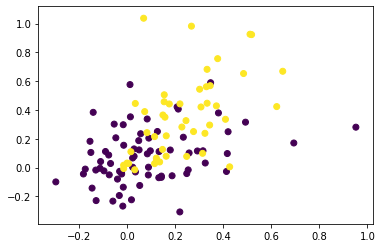

In [21]:
plt.scatter(flick["face_T6"], flick["obj_T6"], c = flick["AGEgrp"])

# Try SVM
Start with a linear kernel

In [59]:
#linear SVM
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X_train_scaled, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [60]:
y_pred = clf.predict(X_test_scaled)

In [61]:
print(y_pred)

[1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1]


In [62]:
print(y_test)

[1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1]


In [63]:
#evaluate the SVM
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16  1]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Try a nonlinear kernel SVM
Compare to the linear one above

In [38]:
#kernel SVM
from sklearn.svm import SVC
clf_poly = SVC(kernel = 'sigmoid', degree=8)
clf_poly.fit(X_train_scaled, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [39]:
y_pred = clf_poly.predict(X_test_scaled)

In [40]:
print(y_pred)

[1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0]


In [41]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  1]
 [ 2  8]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.89      0.80      0.84        10

    accuracy                           0.88        24
   macro avg       0.88      0.86      0.87        24
weighted avg       0.88      0.88      0.87        24

